In [1]:
#kmeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns = ['C_ID','Gender','Age','AnnualIncome','SpendingScore']
df.head()

,C_ID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
### problem statement- Based on Anualincome and Spendinscore cluster the dataset

In [5]:
x=df.iloc[:,-2:].values
print(type(x))

#x.head()
x[:5]

<class 'numpy.ndarray'>


array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [6]:
print(type(x))

<class 'numpy.ndarray'>


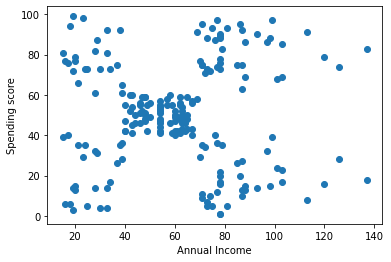

In [7]:
plt.scatter(x[:,0],x[:,1])
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()

In [8]:
from sklearn.cluster import KMeans

C:\Users\anish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


wcss
 [269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37239.835542456036, 30241.343617936585, 25022.485004530354, 21932.39204424098, 19649.596582866965, 17602.19046838677, 16053.151443269991, 14300.044641632878, 12797.675817809642, 12211.600703731754, 11493.432870176419, 10372.121133751305, 9437.88095238095, 8688.432522362695, 8243.673603063602, 7582.386507936508, 7220.91769620129, 6871.474472990778, 6451.555857487923]


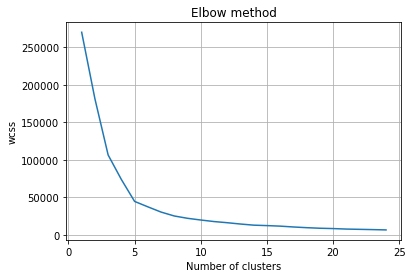

In [9]:
#wcss - within cluster sum of squars
wcss = []
for i in range(1,25):   # i = 1,2,....no of clusters
    model = KMeans(n_clusters = i)
    model.fit(x)
    wcss.append(model.inertia_)
    
print('wcss\n',wcss)
plt.plot(list(range(1,25)),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.grid()
plt.show()

In [13]:
#optimal no of cluster is 5
#applying kmean at k=5
k5 = KMeans(n_clusters = 5,random_state = 0)
k5.fit(x)

KMeans(n_clusters=5, random_state=0)

In [14]:
ypred_k5 = k5.predict(x)
print(ypred_k5)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [15]:
cent5 = k5.cluster_centers_
print(cent5)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


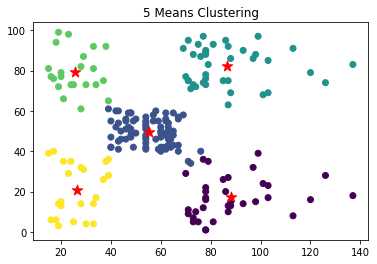

In [17]:
plt.scatter(x[:,0],x[:,1],c = ypred_k5)
plt.scatter(cent5[:,0],cent5[:,1],color = 'red',s = 120,marker= '*')
plt.title('5 Means Clustering')
plt.show()

In [21]:
#increase or decrease cluster 
#incorporate all above code into single set of code
def clustering(k):
    model = KMeans(n_clusters=k,random_state =0)
    model.fit(x)
    ypred = model.predict(x)
    cent = model.cluster_centers_
    plt.scatter(x[:,0],x[:,1],c = ypred)
    plt.scatter(cent5[:,0],cent5[:,1],color = 'red',s = 120,marker= '*')
    plt.title(f'{k} Means Clustering')
    plt.show()
    

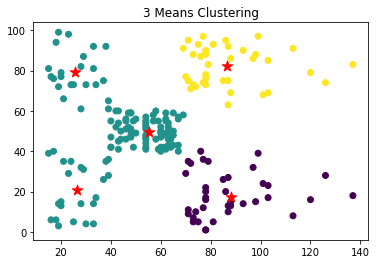

In [22]:
clustering(3)

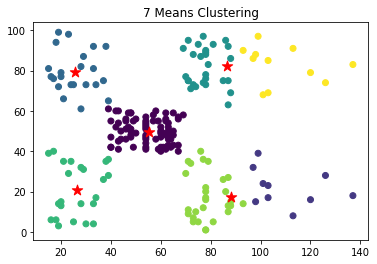

In [23]:
clustering(7)